In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from drive.MyDrive.datas.module.preprocess import *

In [ ]:
dataset = get_dataset()
dataset.tail(3)

,image_path,status,where
10048,/content/Dataset/train/photos/d576ec95366c4641...,photos,train
10049,/content/Dataset/train/photos/ac160f8debc54cc2...,photos,train
10050,/content/Dataset/train/photos/461913c6e5f94427...,photos,train


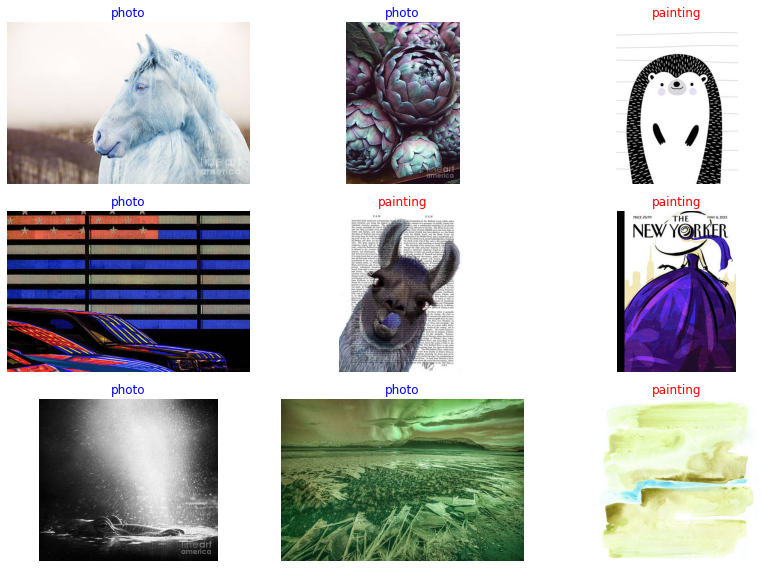

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(12, 8))

for row in range(3):
  for col in range(3):
    ax[row, col].axis('off')
    random_idx = np.random.randint(len(dataset))
    random_path = dataset['image_path'][random_idx]

    image = cv2.imread(random_path)
    ax[row, col].imshow(image, cmap='gray')

    if dataset.loc[random_idx, 'status'] == "photos":
      ax[row, col].title.set_color('b')
      ax[row, col].set_title("photo")
    else:
      ax[row, col].title.set_color('red')
      ax[row, col].set_title('painting')

plt.tight_layout()
plt.show()

In [ ]:
print("train_painting Count :", len(dataset[(dataset['where'] == 'train') & (dataset['status'] == 'painting')]))
print("train_photo Count :", len(dataset[(dataset['where'] == 'train') & (dataset['status'] == 'photos')]))
print("valid_painting Count :", len(dataset[(dataset['where'] == 'valid') & (dataset['status'] == 'painting')]))
print("valid_photo Count :", len(dataset[(dataset['where'] == 'valid') & (dataset['status'] == 'photos')]))

train_painting Count : 3513
train_photo Count : 3528
valid_painting Count : 1505
valid_photo Count : 1505


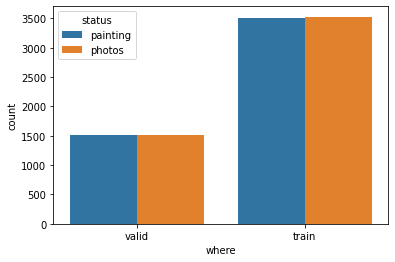

In [ ]:
sns.countplot(data=dataset, x='where', hue='status');

In [ ]:
ls_h, ls_w = [], []
for idx in range(len(dataset)):
  img = cv2.imread(dataset['image_path'][idx])
  h = img.shape[0]
  w = img.shape[1]
  
  ls_h.append(h)
  ls_w.append(w)

dataset['height'] = ls_h
dataset['width'] = ls_w

dataset.tail(2)

,image_path,status,where,height,width
10049,/content/Dataset/train/photos/ac160f8debc54cc2...,photos,train,266,400
10050,/content/Dataset/train/photos/461913c6e5f94427...,photos,train,324,400


In [ ]:
min_h, min_w = dataset['height'].min(), dataset['width'].min()
print(f"Min height : {min_h}, Min width : {min_w}")

Min height : 96, Min width : 80


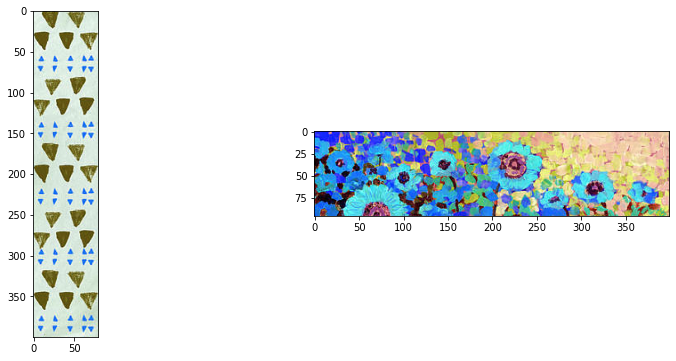

In [ ]:
min_img_idx = dataset[(dataset['height'] == min_h) | (dataset['width'] == min_w)].index

plt.figure(figsize=(14, 6))

plt.subplot(121)
plt.imshow(cv2.imread(dataset.loc[min_img_idx[0], 'image_path']))

plt.subplot(122)
plt.imshow(cv2.imread(dataset.loc[min_img_idx[1], 'image_path']))

plt.show()

height Q1 : 267.0, width Q1 : 314.0


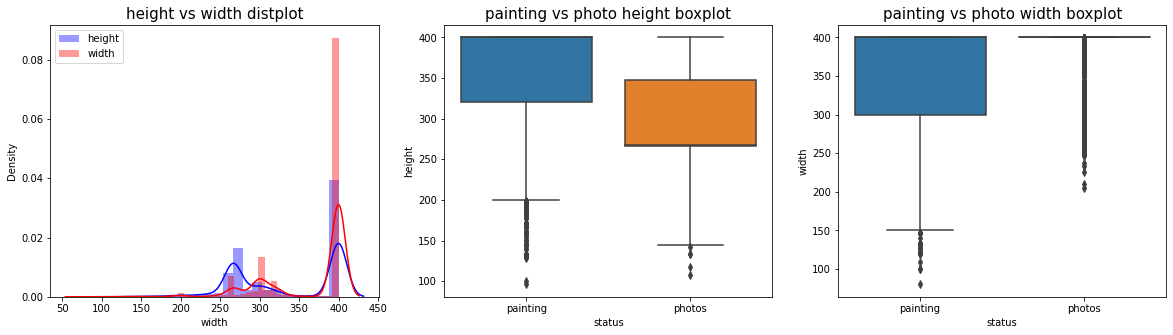

In [ ]:
height_q1, width_q1 = np.percentile(dataset['height'], 25), np.percentile(dataset['width'], 25)
print(f"height Q1 : {height_q1}, width Q1 : {width_q1}")

plt.figure(figsize=(20, 5))

plt.subplot(131)
sns.distplot(dataset['height'], color='b', label="height")
sns.distplot(dataset['width'], color='r', label="width")
plt.title("height vs width distplot", fontsize=15)
plt.legend()

plt.subplot(132)
sns.boxplot(data=dataset, x='status', y='height', orient="v")
plt.title("painting vs photo height boxplot", fontsize=15)

plt.subplot(133)
sns.boxplot(data=dataset, x='status', y='width', orient="v")
plt.title("painting vs photo width boxplot", fontsize=15)

plt.show()

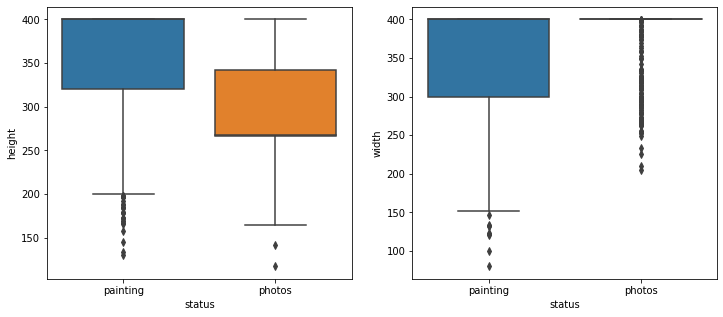

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(data=dataset[dataset["where"] == "valid"], x='status', y='height', orient="v")

plt.subplot(122)
sns.boxplot(data=dataset[dataset["where"] == "valid"], x='status', y='width', orient="v")

plt.show()

In [ ]:
train_df = dataset[dataset["where"] == "train"]
valid_df = dataset[dataset["where"] == "valid"]

In [ ]:
train_photo = np.random.choice(train_df[train_df["status"] == "photos"]["image_path"])
train_painting = np.random.choice(train_df[train_df["status"] == "painting"]["image_path"])
valid_photo = np.random.choice(valid_df[valid_df["status"] == "photos"]["image_path"])
valid_painting = np.random.choice(valid_df[valid_df["status"] == "painting"]["image_path"])

In [ ]:
samples = [train_photo, train_painting, valid_photo, valid_painting]

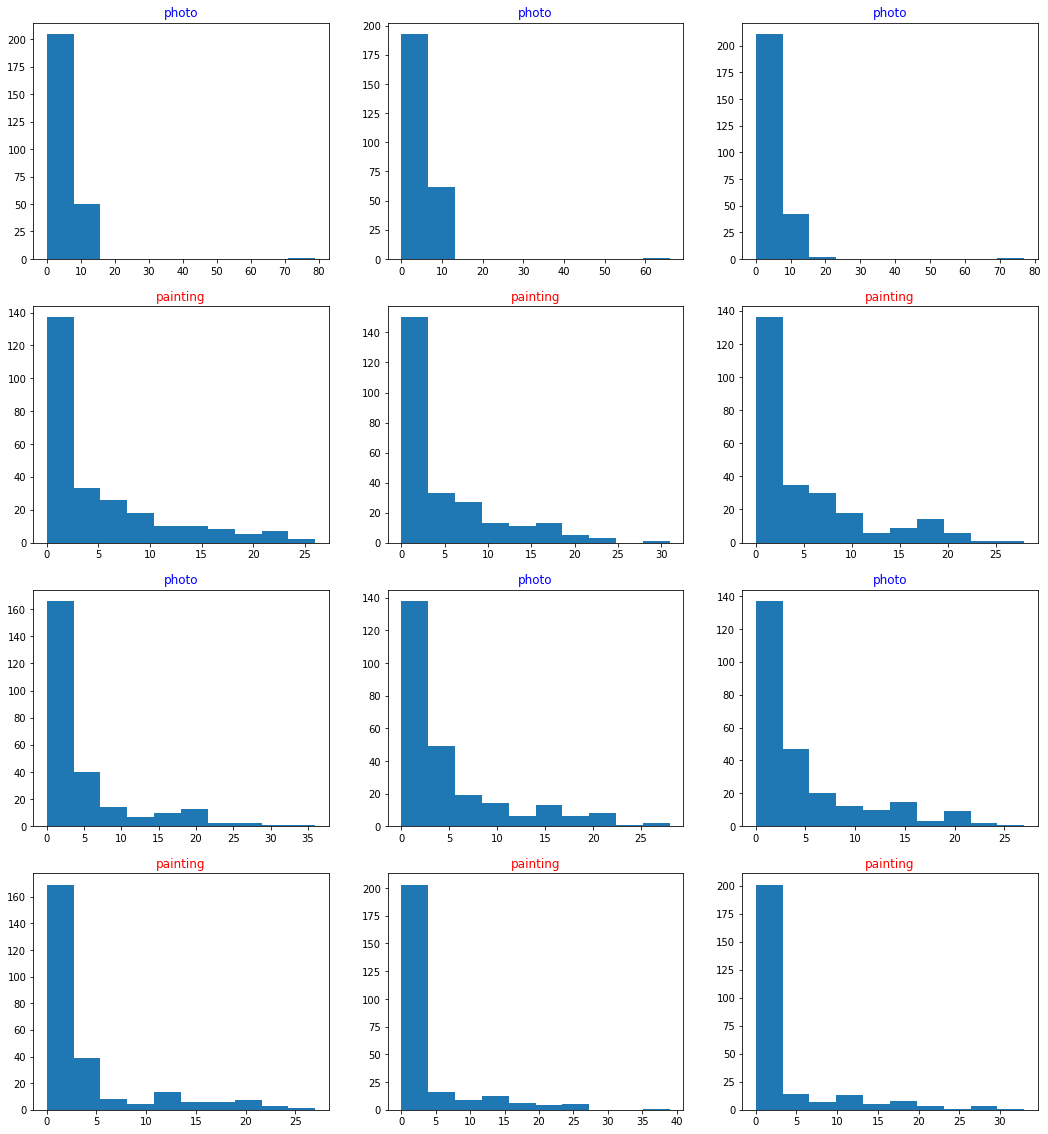

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(18, 20))

for row in range(4):
  image = cv2.imread(samples[row])
  seg_bgr = cvt_hist_vec(image, get_segment=True)
  for col in range(3):
    ax[row, col].hist(seg_bgr[col])

    if row % 2:
      ax[row, col].title.set_color('red')
      ax[row, col].set_title("painting")
    else:
      ax[row, col].title.set_color('b')
      ax[row, col].set_title("photo")
